In [1]:
library(ISLR) # data
library(MASS) # lda and qda
library(class) # knn

# Applied 10

In [2]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


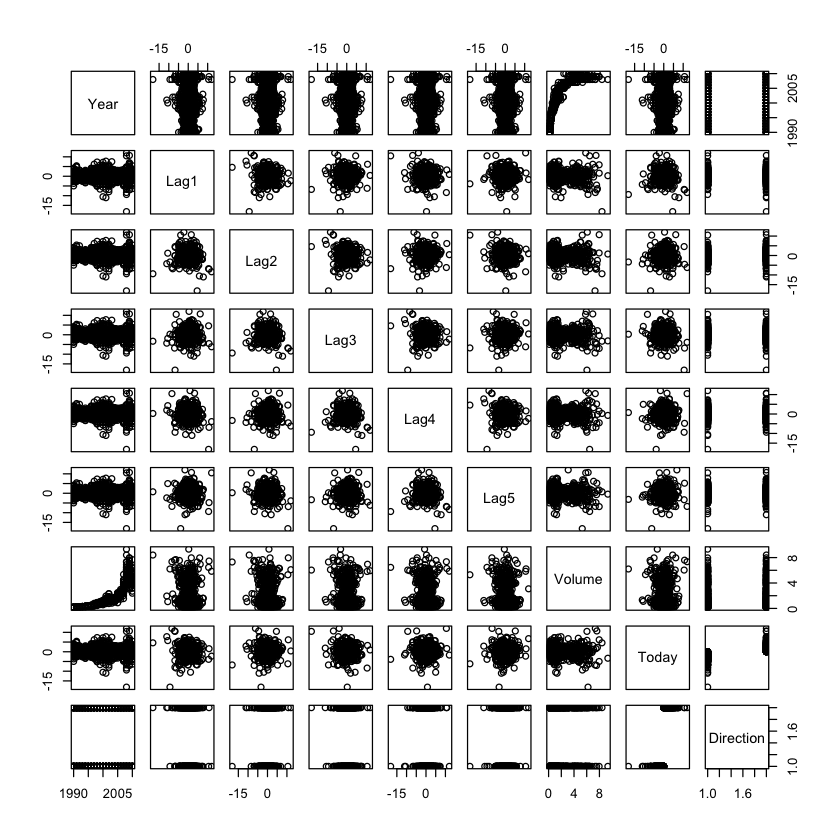

In [3]:
pairs(Weekly)

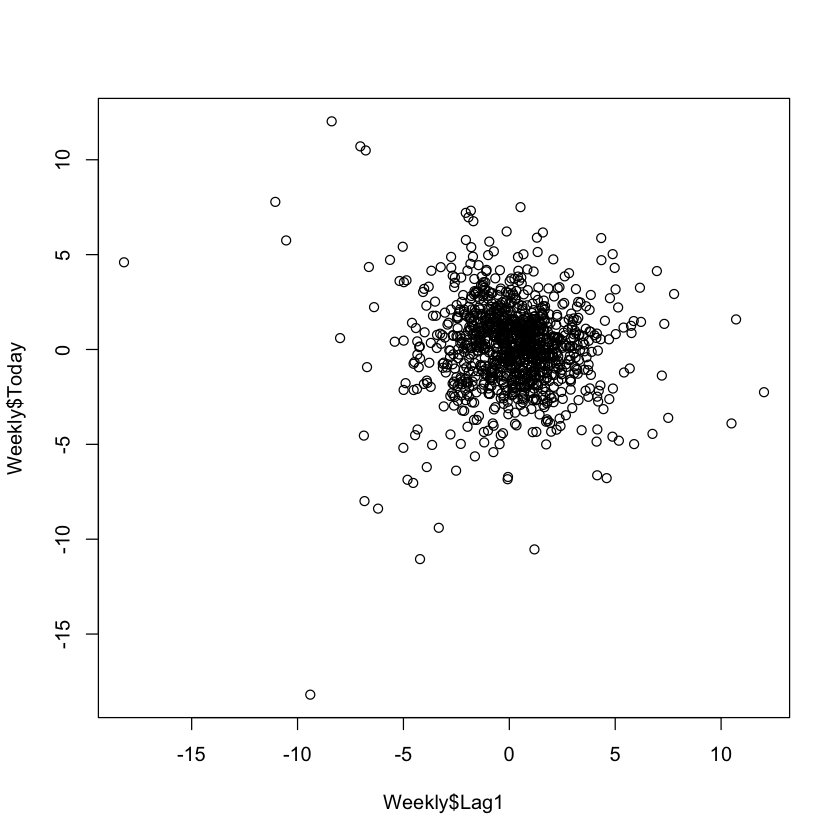

In [4]:
plot(Weekly$Lag1, Weekly$Today)

In [5]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [6]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
            data=Weekly,
            family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


The intercept and Lag2 terms are statistically significant.

In [7]:
summary(glm.fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),0.26686414,0.08592961,3.1056134,0.001898848
Lag1,-0.04126894,0.02641026,-1.5626099,0.118144368
Lag2,0.05844168,0.02686499,2.1753839,0.029601361
Lag3,-0.01606114,0.02666299,-0.6023760,0.546923890
Lag4,-0.02779021,0.02646332,-1.0501409,0.293653342
Lag5,-0.01447206,0.02638478,-0.5485006,0.583348244
Volume,-0.02274153,0.03689812,-0.6163330,0.537674762


In [8]:
# Generate confusion matrix
glm.probs=predict(glm.fit, type='response')
glm.pred=rep('Down', 1089)
glm.pred[glm.probs > 0.5] = 'Up'

In [9]:
# Generate confusion matrix
table(glm.pred, Weekly$Direction)

        
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [10]:
# compute accuracy
mean(glm.pred==Weekly$Direction)

[1] 0.5610652

# train test split

In [11]:
train = (Weekly$Year <= 2008)
test = (Weekly$Year > 2008)
dim(Weekly[train,])
dim(Weekly[test,])

[1] 985   9

[1] 104   9

# logistic regression

In [13]:
glm2.fit = glm(Direction~Lag2,
               data=Weekly[train,],
               family=binomial)
summary(glm2.fit)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly[train, 
    ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


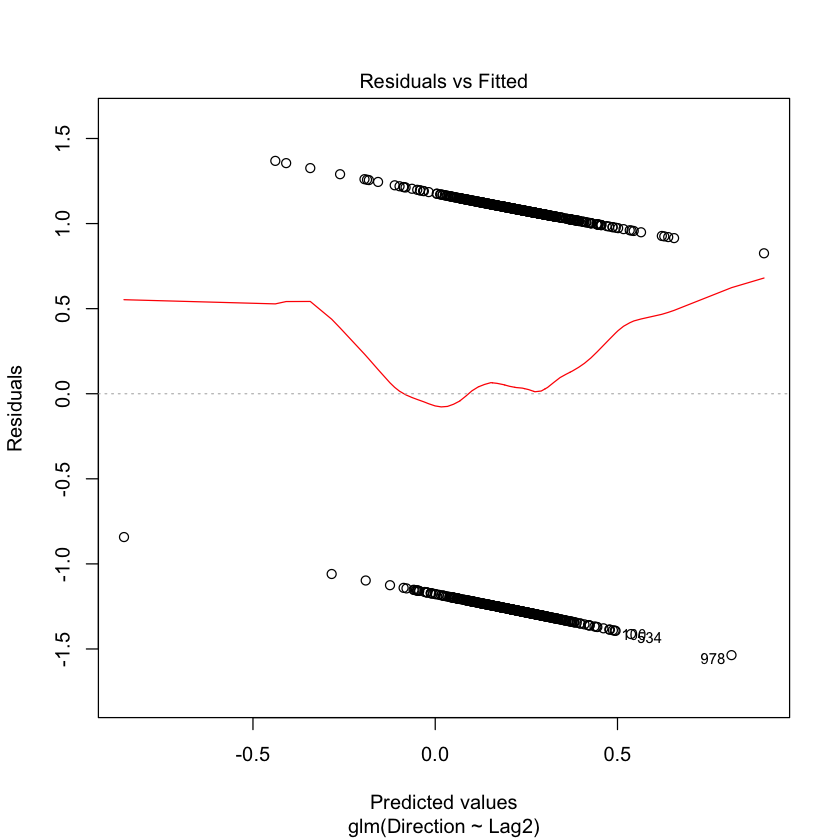

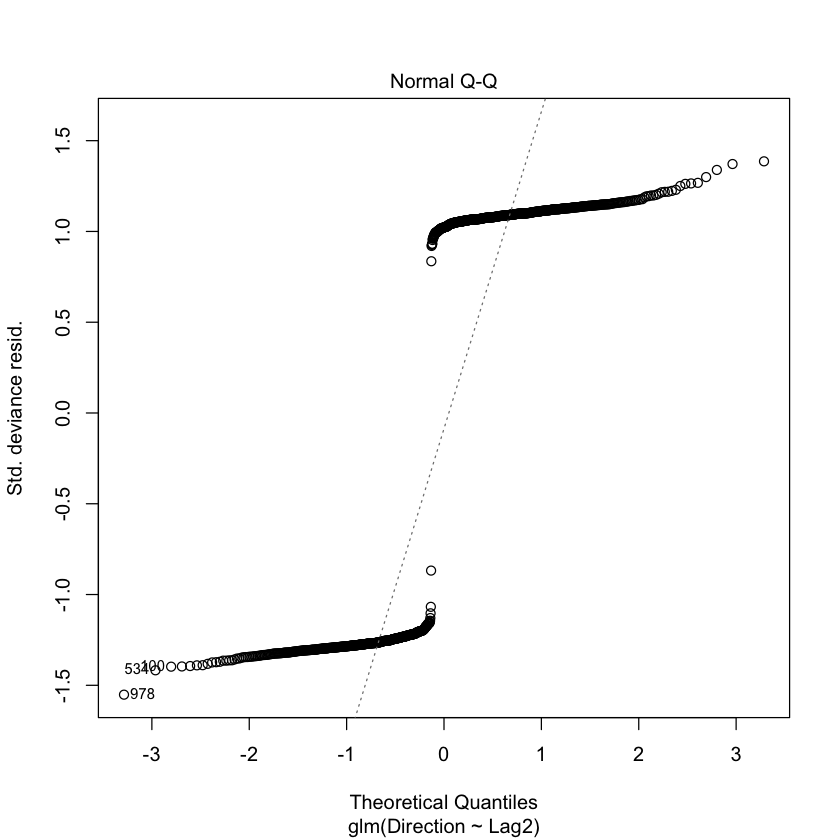

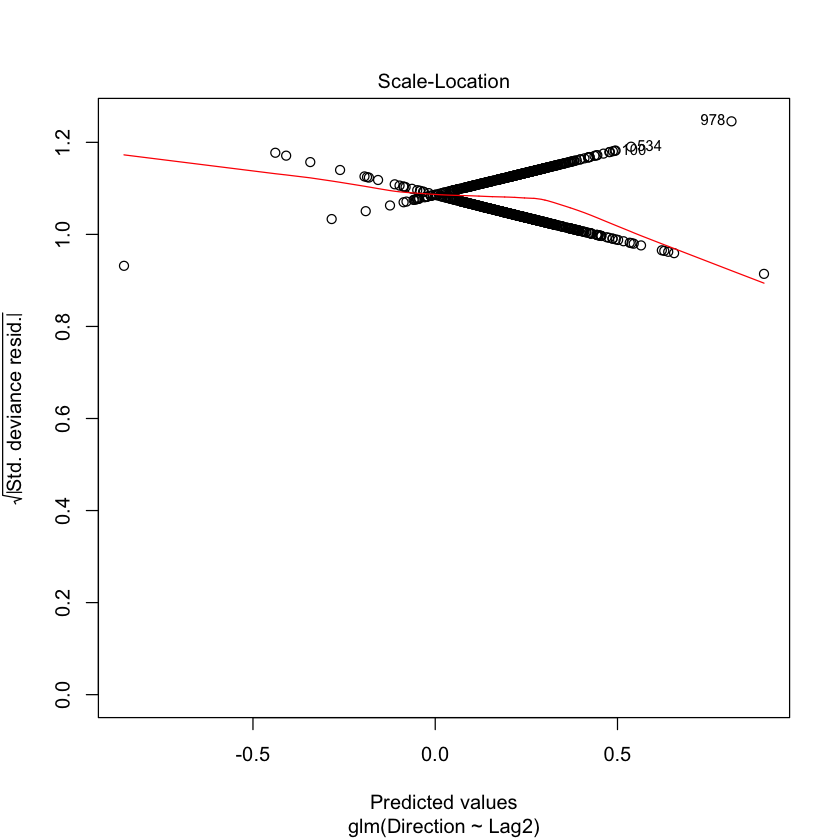

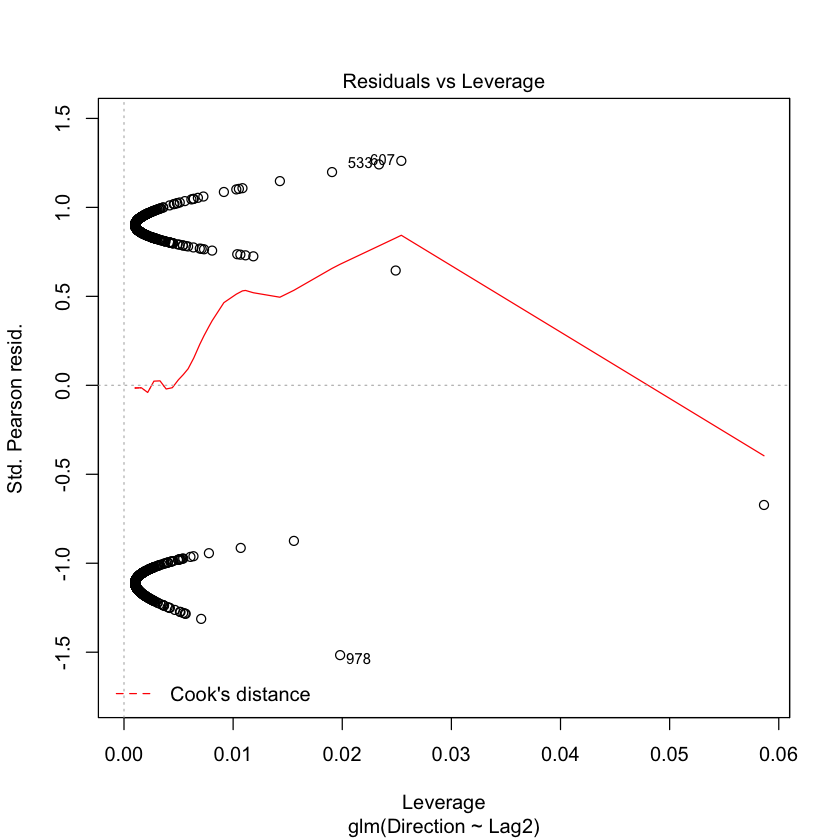

In [14]:
plot(glm2.fit)

In [15]:
glm2.probs = predict(glm2.fit, newdata=Weekly[test,], type='response')
glm2.pred=rep('Down', 104)
glm2.pred[glm2.probs > 0.5] = 'Up'

In [16]:
# Generate confusion matrix
table(glm2.pred, Weekly[test,]$Direction)

         
glm2.pred Down Up
     Down    9  5
     Up     34 56

In [17]:
# compute accuracy
mean(glm2.pred==Weekly[test,]$Direction)

[1] 0.625

# LDA

In [18]:
lda.fit = lda(Direction~Lag2,
              data=Weekly,
              subset=train)
lda.fit

Call:
lda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

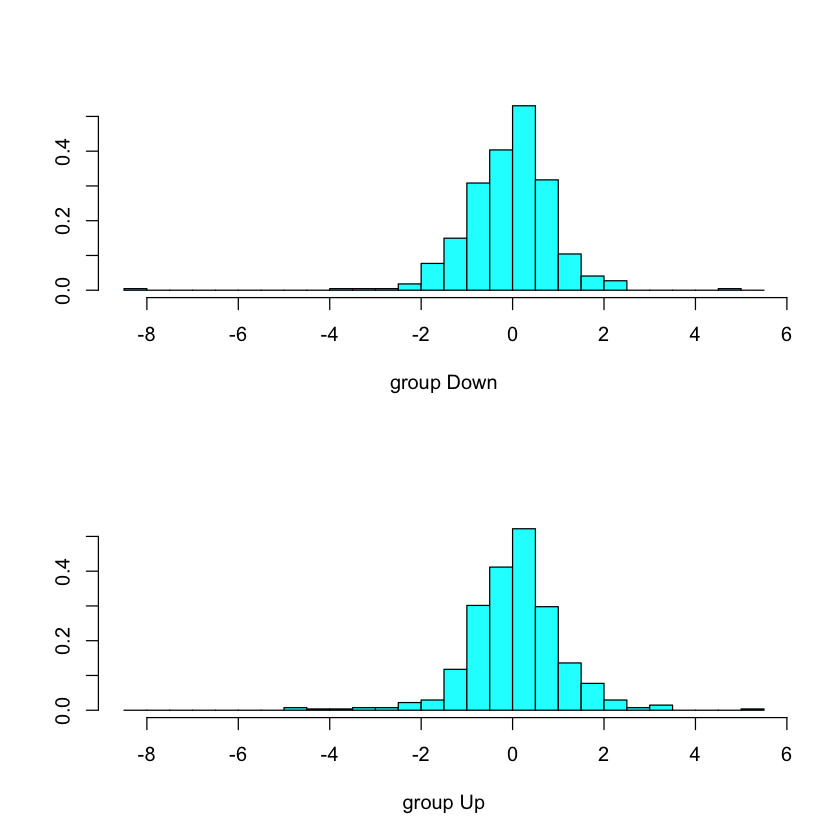

In [19]:
plot(lda.fit)

In [20]:
lda.pred=predict(lda.fit, Weekly[test,])
names(lda.pred)

[1] "class"     "posterior" "x"

In [21]:
# Generate confusion matrix
lda.class=lda.pred$class
table(lda.class, Weekly[test,]$Direction)

         
lda.class Down Up
     Down    9  5
     Up     34 56

In [22]:
# compute accuracy
mean(lda.pred$class==Weekly[test,]$Direction)

[1] 0.625

# QDA

In [23]:
qda.fit = qda(Direction~Lag2,
              data=Weekly,
              subset=train)
qda.fit

Call:
qda(Direction ~ Lag2, data = Weekly, subset = train)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

In [24]:
qda.pred=predict(qda.fit, Weekly[test,])
names(qda.pred)

[1] "class"     "posterior"

In [25]:
# Generate confusion matrix
qda.class=qda.pred$class
table(qda.class, Weekly[test,]$Direction)

         
qda.class Down Up
     Down    0  0
     Up     43 61

In [26]:
# compute accuracy
mean(qda.pred$class==Weekly[test,]$Direction)

[1] 0.5865385

# KNN with K = 1 and 3

In [27]:
# prevent matrix vs vector issues
train.X = subset(Weekly[train,], select='Lag2')
test.X = subset(Weekly[test,], select='Lag2')

In [28]:
knn.1 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=1)
knn.3 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=3)
knn.5 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=5)
knn.10 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=10)
knn.20 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=20)
knn.33 = knn(train=train.X, 
            test=test.X, 
            cl=Weekly[train,]$Direction, 
            k=33)

In [29]:
table(knn.1, Weekly[test,]$Direction)
table(knn.3, Weekly[test,]$Direction)
table(knn.5, Weekly[test,]$Direction)
table(knn.10, Weekly[test,]$Direction)
table(knn.20, Weekly[test,]$Direction)
table(knn.33, Weekly[test,]$Direction)

      
knn.1  Down Up
  Down   21 29
  Up     22 32

      
knn.3  Down Up
  Down   16 19
  Up     27 42

      
knn.5  Down Up
  Down   16 22
  Up     27 39

      
knn.10 Down Up
  Down   19 21
  Up     24 40

      
knn.20 Down Up
  Down   23 21
  Up     20 40

      
knn.33 Down Up
  Down   21 25
  Up     22 36

In [30]:
# for this train / test split, k = 20 gives the highest accuracy
mean(knn.1 == Weekly[test,]$Direction)
mean(knn.3 == Weekly[test,]$Direction)
mean(knn.5 == Weekly[test,]$Direction)
mean(knn.10 == Weekly[test,]$Direction)
mean(knn.20 == Weekly[test,]$Direction)
mean(knn.33 == Weekly[test,]$Direction)

[1] 0.5096154

[1] 0.5576923

[1] 0.5288462

[1] 0.5673077

[1] 0.6057692

[1] 0.5480769

# Logistic Regression with Year and Volume interaction terms

In [31]:
glm3.fit = glm(Direction~Lag2+Volume*Year,
               data=Weekly[train,],
               family=binomial)
summary(glm3.fit)


Call:
glm(formula = Direction ~ Lag2 + Volume * Year, family = binomial, 
    data = Weekly[train, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.449  -1.256   1.012   1.091   1.392  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 30.73685   52.32742   0.587   0.5569  
Lag2         0.05675    0.02966   1.914   0.0557 .
Volume      26.57451   72.66191   0.366   0.7146  
Year        -0.01531    0.02630  -0.582   0.5604  
Volume:Year -0.01323    0.03615  -0.366   0.7143  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1349.1  on 980  degrees of freedom
AIC: 1359.1

Number of Fisher Scoring iterations: 4


In [32]:
glm3.probs = predict(glm3.fit, newdata=Weekly[test,], type='response')
glm3.pred=rep('Down', 104)
glm3.pred[glm3.probs > 0.5] = 'Up'

In [37]:
# Generate confusion matrix
table(glm3.pred, Weekly[test,]$Direction)

         
glm3.pred Down Up
     Down   30 42
     Up     13 19

In [41]:
# compute accuracy
mean(glm3.pred==Weekly[test,]$Direction)

[1] 0.4711538

# Applied 11